In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


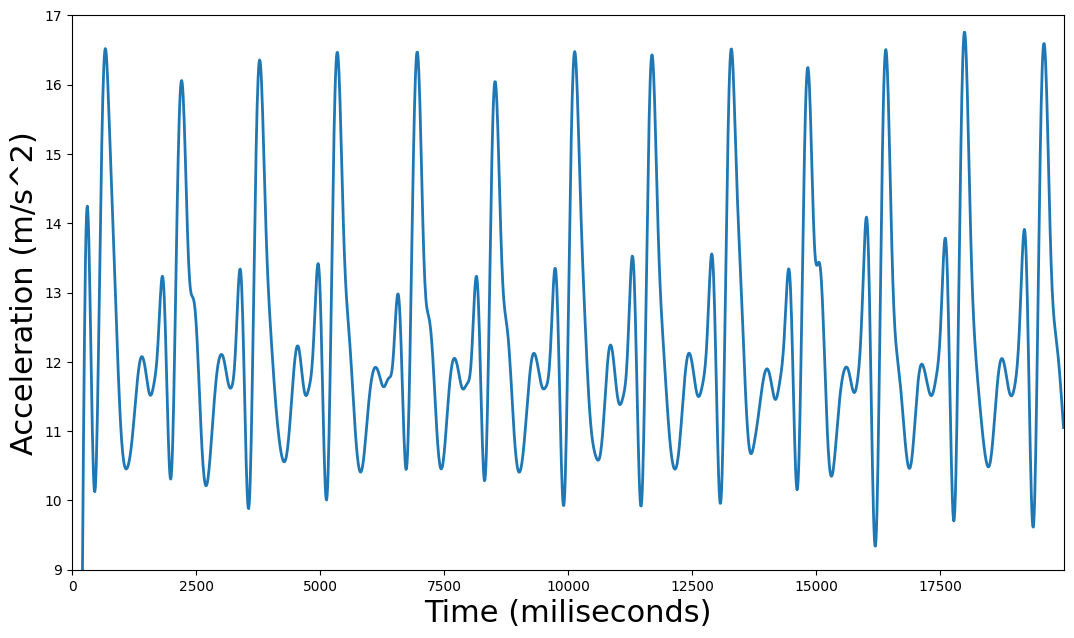

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from matplotlib.animation import FuncAnimation

# Load the CSV data
data = pd.read_csv('drive/MyDrive/project_csv_data/serial_20230913_184043.csv')

data = data[:2000]

# Extract the relevant columns
time = data['timestamps'] - 33173  # Time in milliseconds
acceleration_magnitude = data['mag']

# Filter the acceleration magnitude data using a low-pass Butterworth filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Define filter parameters
cutoff_frequency = 3.0  # Adjust this value as needed
fs = 100  # Sample rate in Hz

filtered_acceleration = butter_lowpass_filter(acceleration_magnitude, cutoff_frequency, fs)

# Create the animated plot
fig, ax = plt.subplots(figsize=(1280/100, 720/100))
# fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = time[:i]
    y = filtered_acceleration[:i]
    line.set_data(x, y)
    return line,

# Set plot limits
ax.set_xlim(0, max(time))
ax.set_ylim(9, 17)  # Restrict y-axis from 7 m/s^2 to 17 m/s^2
ax.set_xlabel('Time (miliseconds)', fontsize=22)
ax.set_ylabel('Acceleration (m/s^2)', fontsize=22)

ani = FuncAnimation(fig, animate, init_func=init, frames=len(time), interval=10, blit=True)

# Save the animation as a video (MP4)
ani.save('acceleration_animation.mp4', writer='ffmpeg')

plt.show()


In [ ]:
data

,timestamps,ax,ay,az,mag,time
0,33173,-1.10,0.21,-0.19,11.33,3268
1,33183,-1.12,0.18,-0.16,11.50,3269
2,33193,-1.13,0.16,-0.03,11.47,3270
3,33203,-1.12,0.19,-0.04,11.42,3271
4,33213,-1.07,0.21,-0.08,10.96,3272
...,...,...,...,...,...,...
1995,53123,-0.98,0.39,-0.07,10.54,5263
1996,53133,-0.97,0.38,-0.05,10.46,5264
1997,53143,-0.98,0.39,-0.08,10.59,5265
1998,53153,-0.99,0.38,-0.19,10.83,5266
